# **Executive Summary: Parabolic SAR Trading Strategy Analysis**

**Project Overview**

This project aims to evaluate the performance of technical trading strategies using 5-minute Bitcoin data from October 25, 2022, to December 15, 2023. The focus is on implementing and testing the Parabolic SAR trading strategy on the BTCUSD trading pair. The strategy's effectiveness is measured using various combinations of parameters to identify the optimal settings.

**Data Summary**

The analysis uses 5-minute BTCUSD trading data extracted from an Excel file. The dataset includes columns such as high, low, open, close, volume, and date. We focus on data between October 25, 2022, and December 15, 2023, to implement and test the Parabolic SAR trading strategy, assuming a starting balance of 2,000 and a per-trade investment of $100.



### **Strategy Implementation**


**Parabolic SAR Strategy**
The Parabolic Stop and Reverse (SAR) is a trend-following indicator that identifies potential reversals by placing points on the chart above or below the price, depending on the trend direction.

**Key Parameters:**

**Step Rate (SR):**

The acceleration factor (AF), which determines how quickly the SAR moves with the trend. The default is 0.02, and it increases by 0.02 up to a maximum of 0.2.

**Maximum Step (Max Step):** The maximum acceleration factor.

**Signals:**

**Buy Signal:**
 When the current closing price is above the Parabolic SAR, and the previous closing price was below it.
**Sell Signal:**
 When the current closing price is below the Parabolic SAR, and the previous closing price was above it.


**Trading Simulation Rules**

Start with a balance of 2,000 and invest $100 per trade.Implement a Take Profit (TP) of 10% and a Stop Loss (SL) of 3%.
Skip trades if insufficient funds are available.
Calculate portfolio value and BTC holdings over time.


**Performance Analysis**

After testing various parameter combinations, the best result was achieved using:

Step Rate (SR): 0.11

Take Profit (TP): 7%

Stop Loss (SL): 3%


**Results**

Final Portfolio Value:  $3557.95

Profit Percentage: 77.90%

**Conclusion**

The Parabolic SAR strategy, when implemented on the BTCUSD pair using 5-minute data from October 25, 2022, to December 15, 2023, demonstrated promising returns with optimal parameter combinations. The combination of SR = 0.11, TP = 7%, and SL = 3% provided a final portfolio value of $3557 with a profit percentage of 77.90%.



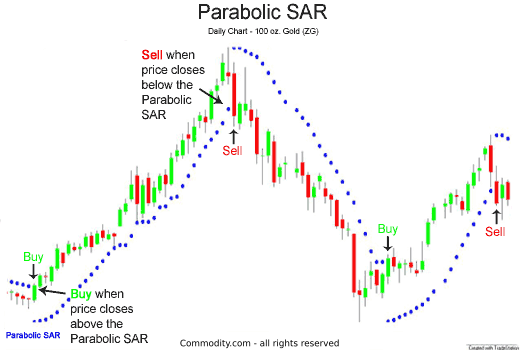






# **Data preparation**

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the CSV file
data = pd.read_csv('/content/drive/My Drive/BTC_ETH.csv',skiprows=range(1, 163), nrows=115199)

# Print the data
print(data)

             low      high      open     close    volume              date  \
0       42955.46  43030.32  43030.32  42955.46  0.835345   12/15/2023 0:00   
1       43019.74  43035.72  43019.74  43024.90  0.114802  12/14/2023 23:55   
2       42988.60  43013.68  42988.60  43013.68  0.870160  12/14/2023 23:50   
3       42956.44  42991.75  42982.04  42979.75  2.168241  12/14/2023 23:45   
4       42962.05  42994.85  42963.97  42994.85  1.204057  12/14/2023 23:40   
...          ...       ...       ...       ...       ...               ...   
115194  19291.07  19298.07  19295.13  19293.69  0.546026   10/25/2022 0:20   
115195  19296.65  19317.71  19317.71  19299.59  1.487230   10/25/2022 0:15   
115196  19315.09  19332.93  19322.85  19317.71  0.799910   10/25/2022 0:10   
115197  19296.52  19323.00  19306.73  19316.79  6.134015   10/25/2022 0:05   
115198  19279.25  19338.35  19332.19  19291.37  4.650611   10/25/2022 0:00   

            pair  
0       BTC-USDT  
1       BTC-USDT  
2     

In [4]:
df = pd.DataFrame(data)

# Convert the 'Date_Time' column to datetime objects
df['Date_Time'] = pd.to_datetime(df['date'])

# Set the 'Date_Time' column as the index
df = df.set_index('Date_Time')

# Sort the index (dates and times)
df = df.sort_index()

# Print the dataframe
print(df)

                          low      high      open     close    volume  \
Date_Time                                                               
2022-10-25 00:00:00  19279.25  19338.35  19332.19  19291.37  4.650611   
2022-10-25 00:05:00  19296.52  19323.00  19306.73  19316.79  6.134015   
2022-10-25 00:10:00  19315.09  19332.93  19322.85  19317.71  0.799910   
2022-10-25 00:15:00  19296.65  19317.71  19317.71  19299.59  1.487230   
2022-10-25 00:20:00  19291.07  19298.07  19295.13  19293.69  0.546026   
...                       ...       ...       ...       ...       ...   
2023-12-14 23:40:00  42962.05  42994.85  42963.97  42994.85  1.204057   
2023-12-14 23:45:00  42956.44  42991.75  42982.04  42979.75  2.168241   
2023-12-14 23:50:00  42988.60  43013.68  42988.60  43013.68  0.870160   
2023-12-14 23:55:00  43019.74  43035.72  43019.74  43024.90  0.114802   
2023-12-15 00:00:00  42955.46  43030.32  43030.32  42955.46  0.835345   

                                 date      pair  


In [5]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=e49b307e6b645fb770bb74bd3c064738a4520d2f854c8dcafb2910be2d25fc5a
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


# **Visualising and Analysis**

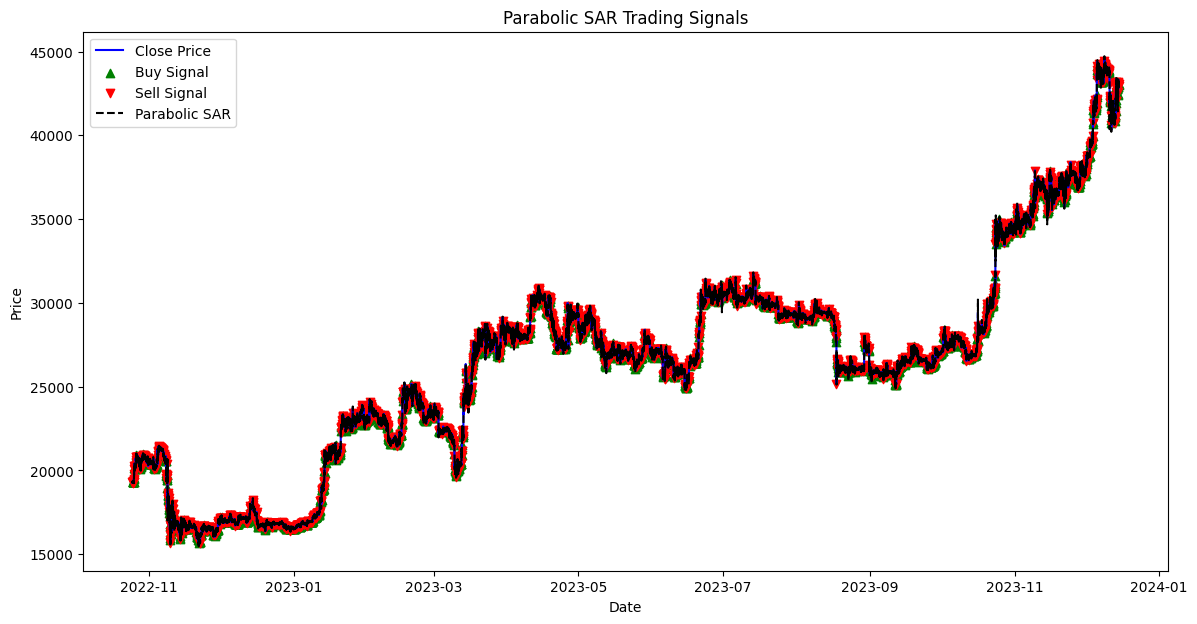

In [6]:
import ta
import matplotlib.pyplot as plt


# Calculate Parabolic SAR
df['parabolic_sar'] = ta.trend.PSARIndicator(
    high=df['high'],
    low=df['low'],
    close=df['close'],
    step=0.03,  # The acceleration factor (AF)
    max_step=0.3  # The maximum step
).psar()

# Generate signals
df['Buy Signal'] = (df['close'] > df['parabolic_sar']) & (df['close'].shift(1) <= df['parabolic_sar'].shift(1))
df['Sell Signal'] = (df['close'] < df['parabolic_sar']) & (df['close'].shift(1) >= df['parabolic_sar'].shift(1))

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['close'], label='Close Price', color='blue')
plt.scatter(df.index[df['Buy Signal']], df['close'][df['Buy Signal']], color='green', marker='^', alpha=1, label='Buy Signal')
plt.scatter(df.index[df['Sell Signal']], df['close'][df['Sell Signal']], color='red', marker='v', alpha=1, label='Sell Signal')
plt.plot(df['parabolic_sar'], label='Parabolic SAR', color='black', linestyle='--')
plt.title('Parabolic SAR Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



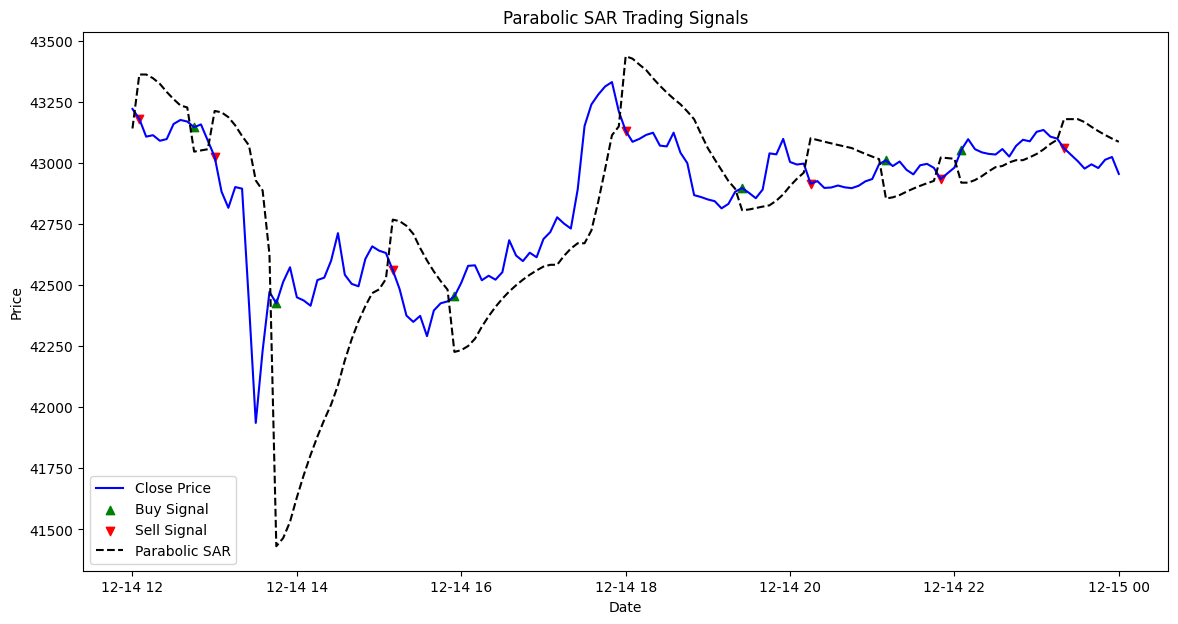

In [7]:
df_last = df[-144:]
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df_last['close'], label='Close Price', color='blue')
plt.scatter(df_last.index[df_last['Buy Signal']], df_last['close'][df_last['Buy Signal']], color='green', marker='^', alpha=1, label='Buy Signal')
plt.scatter(df_last.index[df_last['Sell Signal']],df_last['close'][df_last['Sell Signal']], color='red', marker='v', alpha=1, label='Sell Signal')
plt.plot(df_last['parabolic_sar'], label='Parabolic SAR', color='black', linestyle='--')
plt.title('Parabolic SAR Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [14]:
import ta
import matplotlib.pyplot as plt


# Function to calculate Parabolic SAR and generate signals
def calculate_parabolic_sar(df, step, max_step):
    psar_indicator = ta.trend.PSARIndicator(
        high=df['high'],
        low=df['low'],
        close=df['close'],
        step=step,
        max_step=max_step
    )
    df['parabolic_sar'] = psar_indicator.psar()
    df['Buy Signal'] = (df['close'] > df['parabolic_sar']) & (df['close'].shift(1) <= df['parabolic_sar'].shift(1))
    df['Sell Signal'] = (df['close'] < df['parabolic_sar']) & (df['close'].shift(1) >= df['parabolic_sar'].shift(1))

# Function to simulate the trading strategy with long and short positions
def backtest_strategy(df, initial_capital=2000, trade_size=100, max_investment=2000, tp=0.07, sl=0.03):
    cash = initial_capital
    positions = []  # List to hold data about both long and short trades
    portfolio_values = []

    for index, row in df.iterrows():
        # Close positions that hit TP or SL
        positions_to_remove = []
        for position in positions:
            if position['type'] == 'long':
                price_change = (row['close'] - position['entry_price']) / position['entry_price']
            else:  # 'short'
                price_change = (position['entry_price'] - row['close']) / position['entry_price']

            # Check for closing conditions
            if price_change >= tp or price_change <= -sl:
                if position['type'] == 'long':
                    cash += trade_size * (1 + price_change)
                else:  # 'short'
                    cash += trade_size * (1 - price_change)
                positions_to_remove.append(position)

        # Remove closed positions
        positions = [pos for pos in positions if pos not in positions_to_remove]

        # Open new positions if there is enough cash and not exceeding investment limit
        if cash >= trade_size and len(positions) * trade_size < max_investment:
            if row['Buy Signal']:
                positions.append({
                    'type': 'long',
                    'entry_price': row['close'],
                    'entry_date': index
                })
                cash -= trade_size
            elif row['Sell Signal']:
                positions.append({
                    'type': 'short',
                    'entry_price': row['close'],
                    'entry_date': index
                })
                cash -= trade_size

        # Calculate current portfolio value
        total_invested = trade_size * len(positions)
        current_portfolio_value = cash + total_invested
        portfolio_values.append(current_portfolio_value)

    final_portfolio_value = portfolio_values[-1]
    profit_percentage = ((final_portfolio_value - initial_capital) / initial_capital) * 100

    return portfolio_values, final_portfolio_value, profit_percentage

# Define the parameter ranges
steps = [0.02, 0.03, 0.04, 0.05,0.07]
max_steps = [0.2, 0.3, 0.4, 0.5,0.7]
results = []

# Loop through each combination of step and max_step
for step in steps:
    for max_step in max_steps:
        # Calculate Parabolic SAR and generate signals
        calculate_parabolic_sar(df, step, max_step)

        # Run backtesting
        portfolio_values, final_value, profit_pct = backtest_strategy(df)

        # Store the results
        results.append({
            'Step': step,
            'Max Step': max_step,
            'Final Portfolio Value': final_value,
            'Profit Percentage': profit_pct
        })

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)


    Step  Max Step  Final Portfolio Value  Profit Percentage
0   0.02       0.2            3437.419162          71.870958
1   0.02       0.3            3449.390980          72.469549
2   0.02       0.4            3449.341867          72.467093
3   0.02       0.5            3449.341867          72.467093
4   0.02       0.7            3449.341867          72.467093
5   0.03       0.2            3470.042405          73.502120
6   0.03       0.3            3491.484539          74.574227
7   0.03       0.4            3500.800520          75.040026
8   0.03       0.5            3500.800520          75.040026
9   0.03       0.7            3500.800520          75.040026
10  0.04       0.2            3472.451179          73.622559
11  0.04       0.3            3512.127238          75.606362
12  0.04       0.4            3519.800828          75.990041
13  0.04       0.5            3532.315123          76.615756
14  0.04       0.7            3532.175987          76.608799
15  0.05       0.2      

Final Portfolio Value: $3557.95
Profit Percentage: 77.90%


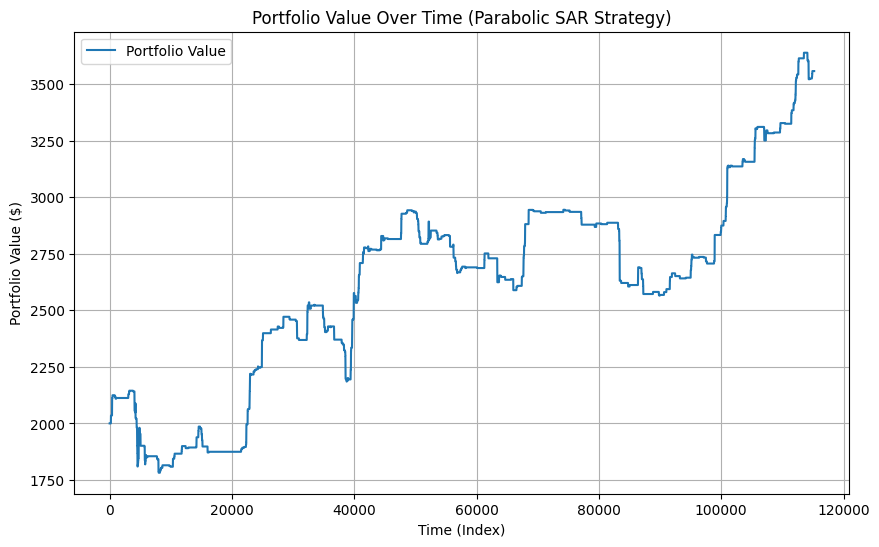

In [13]:

# Function to calculate Parabolic SAR and generate signals
def calculate_parabolic_sar(df, step, max_step):
    psar_indicator = ta.trend.PSARIndicator(
        high=df['high'],
        low=df['low'],
        close=df['close'],
        step=step,
        max_step=max_step
    )
    df['parabolic_sar'] = psar_indicator.psar()
    df['Buy Signal'] = (df['close'] > df['parabolic_sar']) & (df['close'].shift(1) <= df['parabolic_sar'].shift(1))
    df['Sell Signal'] = (df['close'] < df['parabolic_sar']) & (df['close'].shift(1) >= df['parabolic_sar'].shift(1))

# Function to simulate the trading strategy with long and short positions
def backtest_strategy(df, initial_capital=2000, trade_size=100, max_investment=2000, tp=0.07, sl=0.03):
    cash = initial_capital
    positions = []  # List to hold data about both long and short trades
    portfolio_values = []

    for index, row in df.iterrows():
        # Close positions that hit TP or SL
        positions_to_remove = []
        for position in positions:
            if position['type'] == 'long':
                price_change = (row['close'] - position['entry_price']) / position['entry_price']
            else:  # 'short'
                price_change = (position['entry_price'] - row['close']) / position['entry_price']

            # Check for closing conditions
            if price_change >= tp or price_change <= -sl:
                if position['type'] == 'long':
                    cash += trade_size * (1 + price_change)
                else:  # 'short'
                    cash += trade_size * (1 - price_change)
                positions_to_remove.append(position)

        # Remove closed positions
        positions = [pos for pos in positions if pos not in positions_to_remove]

        # Open new positions if there is enough cash and not exceeding investment limit
        if cash >= trade_size and len(positions) * trade_size < max_investment:
            if row['Buy Signal']:
                positions.append({
                    'type': 'long',
                    'entry_price': row['close'],
                    'entry_date': index
                })
                cash -= trade_size
            elif row['Sell Signal']:
                positions.append({
                    'type': 'short',
                    'entry_price': row['close'],
                    'entry_date': index
                })
                cash -= trade_size

        # Calculate current portfolio value
        total_invested = trade_size * len(positions)
        current_portfolio_value = cash + total_invested
        portfolio_values.append(current_portfolio_value)

    final_portfolio_value = portfolio_values[-1]
    profit_percentage = ((final_portfolio_value - initial_capital) / initial_capital) * 100

    return portfolio_values, final_portfolio_value, profit_percentage

# Calculate Parabolic SAR and generate signals
calculate_parabolic_sar(df, step=0.05, max_step=0.5)

# Run backtesting
portfolio_values, final_value, profit_pct = backtest_strategy(df)

# Print results
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Profit Percentage: {profit_pct:.2f}%")

# Visualize portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(portfolio_values, label='Portfolio Value')
plt.title('Portfolio Value Over Time (Parabolic SAR Strategy)')
plt.xlabel('Time (Index)')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()
